In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv(r"F:\Full Stack Data Science I Neuron\EDA Datasets\Algerian forest fire\Algerian_forest_fires_dataset_UPDATE.csv",header = 1,skipinitialspace = True)

In [3]:
# df = pd.read_csv(r"F:\Full Stack Data Science I Neuron\1 october 2022\Algerian_forest_fires_dataset_UPDATE.csv",header = 1,skipinitialspace = True)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.shape

(246, 14)

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.rename(columns = {'Classes  ':'Classes'}, inplace = True)
df.rename(columns = {'Rain ':'Rain'}, inplace = True)

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [9]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df["Classes"] = df["Classes"].replace(" ","")

In [ ]:
for i in df["Classes"]:
    if i in ['fire   ', 'fire ']:
        i.strip(" ")

In [10]:
df.loc[df["Classes"] == "fire   ", "Classes"] = 'fire'
df.loc[df["Classes"] == 'fire ', "Classes"] = 'fire'
df.loc[df["Classes"] == 'not fire ', "Classes"] = 'not fire'
df.loc[df["Classes"] == 'not fire     ', "Classes"] = 'not fire'
df.loc[df["Classes"] == 'not fire    ', "Classes"] = 'not fire'
df.loc[df["Classes"] == 'not fire   ', "Classes"] = 'not fire'


In [11]:
df["Classes"].unique()

array(['not fire', 'fire', nan, 'Classes  '], dtype=object)

In [ ]:
df["Classes"]

# Converting Object data types to relevant datatypes

In [12]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [13]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [14]:
df_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}
df=df.astype(df_convert)
df.dtypes

ValueError: invalid literal for int() with base 10: 'Sidi-Bel Abbes Region Dataset'

In [ ]:
# df['Temperature'] = pd.to_numeric(df['Temperature'],errors = 'coerce')
# df['day'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['Classes'] = df['Classes'].astype(str)
# df['year'] = pd.to_numeric(df['year'],errors = 'coerce')
# df['RH'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['Ws'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['Rain'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['FFMC'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['DMC'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['DC'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['ISI'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['BUI'] = pd.to_numeric(df['day'],errors = 'coerce')
# df['FWI'] = pd.to_numeric(df['day'],errors = 'coerce')

In [15]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [16]:
df['Rain'].isnull().sum()

1

In [17]:
df[df['Rain'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.loc[120:134]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [19]:
df.drop(122,inplace = True)
df.drop(123,inplace = True)

In [20]:
df[df['Rain'].isnull()]       #check

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [21]:
df_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}
df=df.astype(df_convert)
df.dtypes

ValueError: could not convert string to float: '14.6 9'

In [22]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [23]:
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]= df[feature].str.replace(" ","")

In [24]:
df_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}
df=df.astype(df_convert)
df.dtypes

ValueError: could not convert string to float: 'fire'

In [25]:
df.reset_index(drop = True,inplace = True)

In [26]:
len(df["Classes"])

244

In [27]:
df[df["Classes"].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN


In [28]:
df.loc[165,"Classes"] = "fire"

In [29]:
df.loc[165,"FWI"] = 1

In [30]:
df_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
                  'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64'}
df=df.astype(df_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [ ]:
df

In [31]:
df[df["Classes"].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


# Region Classification

In [32]:
df.iloc[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,notfire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,notfire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,notfire


In [33]:
df.loc[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,notfire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,notfire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,notfire


In [34]:
df.loc[:121,'Region'] = "Bejiaja"

In [35]:
df.loc[122:,'Region'] = "Sidel-Abis"

In [36]:
df['Region'].unique()

array(['Bejiaja', 'Sidel-Abis'], dtype=object)

In [37]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Classification of variables into Numerical and categorical

In [38]:
numerical_variables = [x for x in df.columns if df[x].dtypes !='O' ]

In [ ]:
numerical_variables

In [39]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

# Classification of variables into Discrete and continuous

In [40]:
discrete = [feature for feature in numeric_data if len(numeric_data[feature].unique()) <25]

In [41]:
continuous = [feature for feature in numeric_data if len(numeric_data[feature].unique()) >=25]

In [ ]:
discrete

In [ ]:
continuous

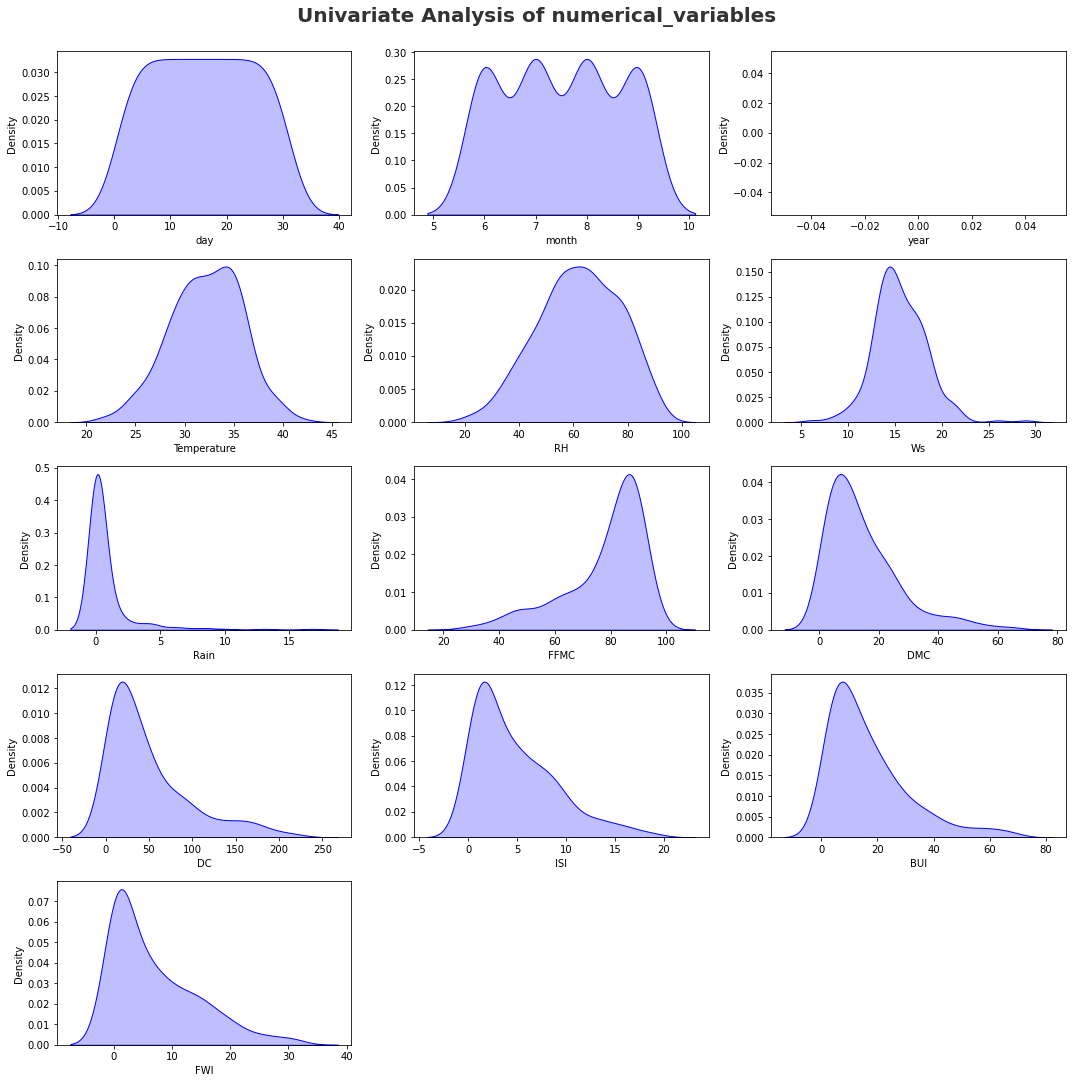

In [42]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of numerical_variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_variables)):
    plt.subplot(5,3, i+1)
    sns.kdeplot(x=df[numerical_variables[i]],shade=True, color='b')
    plt.xlabel(numerical_variables[i])
    plt.tight_layout()

In [45]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,Bejiaja
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,Bejiaja
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,Bejiaja
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,Bejiaja
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,Bejiaja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidel-Abis
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,Sidel-Abis
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,Sidel-Abis
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,Sidel-Abis


In [44]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.010656
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.435288
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Training the model

In [47]:
df['Temp']=df['Temperature']
df.drop('Temperature', axis=1, inplace=True)

In [69]:
### encoding classes feature
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')
### encoding classes feature
df['Region']=df['Region'].str.replace('Bejiaja','0')
df['Region']=df['Region'].str.replace('Sidel-Abis','1')

In [70]:
df.tail()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
239,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,30
240,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,28
241,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,27
242,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,24
243,30,9,2012,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1,24


In [71]:
## independent and Dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting the data into Training and Test data

In [72]:
### splitting the data into training and test dataset
from sklearn.model_selection import train_test_split

In [73]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
X_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,2012,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0
65,5,8,2012,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0
132,11,6,2012,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1
207,25,8,2012,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1
162,11,7,2012,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1


In [75]:
X_test.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,2012,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0
6,7,6,2012,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
153,2,7,2012,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1
211,29,8,2012,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1
198,16,8,2012,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1


In [76]:
y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [77]:
### both will have same shape
X_test.shape, y_test.shape

((81, 14), (81,))

# 3.0 Feature Engineering
# 3.1 Standardisation/ feature scaling the dataset

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [80]:
### Using fit_transform to standardise Train data
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 ,  0.        , ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.        , ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472,  0.        , ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.        , ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238,  0.        , ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.        , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [81]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test=scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.        , ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472,  0.        , ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238,  0.        , ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238,  0.        , ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.        , ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472,  0.        , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

# 4.0 Model Building
# 1.0 Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [84]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [94]:
### Printing co-efficients and intercept of best fit
coefficient = linear_reg.coef_
intercept = linear_reg.intercept_
print("1. Co-efficients of independent features is {}".format(coefficient))
print("2. Intercept of best fit hyper plane is {}".format(intercept))

1. Co-efficients of independent features is [-6.29946839e-01 -3.30806923e-01 -4.44089210e-16 -9.68152302e-01
 -5.57690535e-01  2.36452852e-01  1.90585623e+00  9.33805925e-01
  1.17296981e+00  4.45810030e-02 -1.35995788e+00  1.97724938e-01
 -2.52309217e-01  8.34562604e-02]
2. Intercept of best fit hyper plane is 31.98159509202454


# 1.1 Using model to get predictions of test data

In [86]:
linear_reg_pred=linear_reg.predict(X_test)
linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.32

# 1.2 Validating model using assumptions of Linear regression
1.2.1 Linear relationship

Test truth data and Predicted data should follow linear relationship.

This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

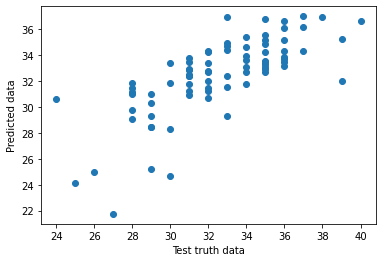

In [87]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

# 1.2.2 Residual distribution

Residuals should follow normal distribution.

If residuals follow normal distribution, it indicates we have a good model.

In [88]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg.head()

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
Name: Temp, dtype: float64

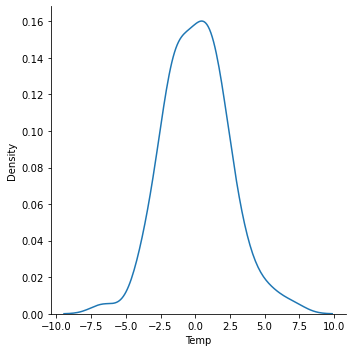

In [89]:
sns.displot(x=residual_linear_reg, kind='kde')

# 1.2.3 Uniform distribution

Residuals vs Predictions should follow a uniform distribution.

If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

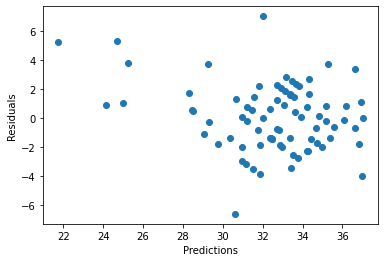

In [90]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# 1.3 Performance Matrix
1.3.1 Cost function values

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# MSE, MAE and RMSE

In [92]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, linear_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, linear_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root Mean squared error is 2.29


# 1.3.2 R Square and Adjusted R Square values

In [93]:
from sklearn.metrics import r2_score
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
print("Our Linear regression model has {} % accuracy".format(round(linear_reg_r2_score*100,3)))

linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

Our Linear regression model has 51.104 % accuracy
Adjusted R square accuracy is 40.73 percent
